In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [ ]:
df = pd.read_csv('data_cleaned.csv')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Type,Make,Model,Year,Total_star,Review,Safety,Technology,Performance,Interior,Comfort,Reliability,Value
0,0,0,SUVs,volkswagen,taos,2022,5,"I recently traded in my 2017 Honda HR-V in ""Ba...",5,4,4,4,5,5,5
1,1,2,SUVs,volkswagen,taos,2022,5,Recently purchased a Taos in the base trim (S)...,5,5,5,3,4,0,5
2,2,3,SUVs,volkswagen,taos,2022,5,This car feels premium and looks handsome. It...,0,5,5,5,5,0,5
3,3,4,SUVs,volkswagen,taos,2022,1,"Bought the White SEL, love everything about it...",1,3,3,4,4,1,2
4,4,5,SUVs,volkswagen,taos,2022,5,"The FWD Taos S is a sporty, fun drive. It look...",4,4,5,4,5,5,5


In [ ]:
df = df.iloc[:,2:]

# Tf-Idf with Clustering

In [ ]:
# Remove na rows
X = df['Review']
X.shape

(18449,)

In [ ]:
X.dropna(inplace = True)
X.shape

(18449,)

In [ ]:
# Take a sample to do clustering, other wise it depletes the memory

In [ ]:
X_sample = X.sample(10000)

In [ ]:
# Vectorize just based on the review
vectorizer = TfidfVectorizer()
review_matrix = vectorizer.fit_transform(X_sample).toarray()

In [ ]:
review_matrix.shape

(10000, 19440)

In [ ]:
review_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05627026, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#K-means Clustering - Determine the optimal number of clusters
#sum_of_squares = []
#for i in range(1,11):
#    KM = KMeans(n_clusters = i, random_state = 7)
#    KM.fit(review_matrix)
#    sum_of_squares.append(KM.inertia_)

Text(0, 0.5, 'Sum of Squares')

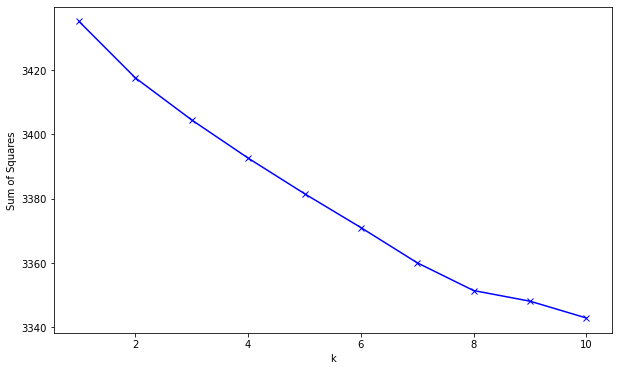

In [ ]:
# It is hard to determine the ideal number of clusters from this.
#plt.figure(figsize=(10,6))
#plt.plot(range(1,11), sum_of_squares, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Sum of Squares')

In [ ]:
# Assume the ideal number is 8 clusters.
# Don't do cluster analysis with all rows, just take a sample of 10.000 - Otherwise it runs out of memory and there are errors
KM = KMeans(n_clusters = 8, random_state = 10)
clusters = KM.fit_predict(review_matrix)
clusters = pd.Series(clusters, name = 'cluster')

In [ ]:
clusters

0       6
1       2
2       2
3       0
4       2
       ..
9995    5
9996    2
9997    3
9998    2
9999    3
Name: cluster, Length: 10000, dtype: int32

In [ ]:
df_cluster = pd.DataFrame(review_matrix)
df_cluster = pd.concat([df_cluster,clusters],axis = 1)

In [ ]:
df_cluster

,0,1,2,3,4,5,6,7,8,9,...,19431,19432,19433,19434,19435,19436,19437,19438,19439,cluster
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9996,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9997,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
9998,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
#lenght of dictionary in vectorizer
len(vectorizer.get_feature_names())

19440

In [ ]:
#KM = KMeans(n_clusters = 8, random_state = 10).fit(review_matrix)

In [ ]:
# Divide and extract each cluster into a separate dataframe
cluster0_ind = df_cluster.loc[df_cluster['cluster'] == 0].index
cluster1_ind = df_cluster.loc[df_cluster['cluster'] == 1].index
cluster2_ind = df_cluster.loc[df_cluster['cluster'] == 2].index
cluster3_ind = df_cluster.loc[df_cluster['cluster'] == 3].index
cluster4_ind = df_cluster.loc[df_cluster['cluster'] == 4].index
cluster5_ind = df_cluster.loc[df_cluster['cluster'] == 5].index
cluster6_ind = df_cluster.loc[df_cluster['cluster'] == 6].index
cluster7_ind = df_cluster.loc[df_cluster['cluster'] == 7].index

cluster0 = X_sample.iloc[cluster0_ind].to_frame()
cluster1 = X_sample.iloc[cluster1_ind].to_frame()
cluster2 = X_sample.iloc[cluster2_ind].to_frame()
cluster3 = X_sample.iloc[cluster3_ind].to_frame()
cluster4 = X_sample.iloc[cluster4_ind].to_frame()
cluster5 = X_sample.iloc[cluster5_ind].to_frame()
cluster6 = X_sample.iloc[cluster6_ind].to_frame()
cluster7 = X_sample.iloc[cluster7_ind].to_frame()

In [ ]:
cluster_list = [cluster0, cluster1, cluster2,
                cluster3, cluster4, cluster5,
                cluster6, cluster7]

In [ ]:
def features_idf(cluster):
    vectorizer.fit(cluster['Review'])
    #vectorizer = TfidfVectorizer()
    #aux = vectorizer.fit_transform(cluster['Review']).toarray()
    dct = {}
    for a, b in zip(vectorizer.vocabulary_,vectorizer.idf_):
        dct[a] = b
    sorted_result = sorted(dct.items(), key=lambda x: x[1], reverse=True)
    return sorted_result

In [ ]:
result_list1 = []
result_list2 = []
for cluster in cluster_list:
#     result_list.append(features_idf(cluster['reviewText'])[0:10])
    results = features_idf(cluster)
    result_list1.append(results[-10:])
    result_list2.append(results[0:10])

In [ ]:
result_list1

[[('jerry', 1.5480199937740395),
  ('7liter', 1.5306282510621703),
  ('obviously', 1.4259576284982818),
  ('hvac', 1.3774632785596714),
  ('wednesday', 1.297875840641324),
  ('government', 1.2951473259881199),
  ('situations', 1.2951473259881199),
  ('dropped', 1.1770615810816574),
  ('pop', 1.1114642985958443),
  ('escalade', 1.002030457550382)],
 [('tracked', 2.0283290019185762),
  ('race', 2.0143845528599433),
  ('awareness', 2.0133959220330038),
  ('divider', 2.0045419537157487),
  ('stranded', 1.9996567461496997),
  ('usage', 1.892543381664459),
  ('0l', 1.7296742507973195),
  ('inputs', 1.687424704285879),
  ('heat', 1.4204622272059038),
  ('6cylinder', 1.3626365198230408)],
 [('switches', 1.3736245022525055),
  ('retailed', 1.352203164547339),
  ('expert', 1.273405386095098),
  ('frankensteined', 1.2138729311246825),
  ('enable', 1.208544751893057),
  ('altitudes', 1.1521918153419253),
  ('usefully', 1.1331953146512703),
  ('parents', 1.0527391275424447),
  ('sense', 1.027028672

## Extract the Aspects with the maximum score of tf idf

In [ ]:
df_features = pd.DataFrame(vectorizer.get_feature_names())

In [ ]:
df_features.sample(5)

,0
5861,diagnosed
8137,genuine
9537,information
9805,inviting
10062,junkie


In [ ]:
#separate into each cluster
each_cluster = []
for i in range(0,8):
    each_cluster.append(df_cluster[df_cluster['cluster']==i])

In [ ]:
features = defaultdict(list)
for i in range(0,8):
    aux1 = each_cluster[i].drop(columns=['cluster'])
    aux2 = pd.DataFrame({'tfidf':aux1.max()})
    aux3 = aux2.sort_values(by='tfidf',ascending=False)
    #extract the top 10 features with max tf-idf score
    max_tfidfs = aux3[0:10]
    for j in max_tfidfs.index:
        features[i].append(df_features.iloc[j][0])

In [ ]:
features[0]

['truck',
 'loving',
 'excellent',
 'frills',
 'tha',
 '4x4',
 'lot',
 '250',
 'good',
 'ranger']

In [ ]:
features[1]

['yes',
 'monster',
 'aawesome',
 'value',
 'sporty',
 'excellent',
 'roadster',
 'excelente',
 'magnificent',
 'size']

In [ ]:
features[2]

['quiet',
 'fun',
 'nx',
 'z4',
 'tiguan',
 'ls',
 'jetta',
 'welds',
 'exists',
 'lincoln']

In [ ]:
features[3]

['chug',
 'shutdown',
 'daytona',
 'rust',
 'island',
 'mmi',
 'van',
 'armada',
 'lincoln',
 'recirculate']

In [ ]:
features[4]

['disappoint',
 'regreted',
 'afford',
 'enjoy',
 'wrong',
 'greatest',
 'ev',
 'find',
 'confirm',
 'regret']

In [ ]:
features[5]

['suc',
 'trucks',
 'alternative',
 'auto',
 'confort',
 'drivers',
 'salesperson',
 'guzzler',
 'great',
 'stable']

In [ ]:
features[6]

['canyons',
 'gladiator',
 'runner',
 'rxl',
 'willys',
 'love',
 'drive',
 '4runner',
 'unbelievable',
 'futures']

In [ ]:
features[7]

['v60',
 'we',
 'exceptional',
 'lot',
 'following',
 'forester',
 'teen',
 'passport',
 'venza',
 'corsair']

## LDA Topic Modeling

In [ ]:
#pip install --upgrade gensim

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer('english')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sergio.abbate\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Lemmatization: Means that the words are changed to the present form. Verbs in the past or future are transformed to present
# Also means that the words in 3rd or 2nd person are transformed to 1st person

# Stemming: Means that the words are reduced to their root form. Example comfortable is transformed to comfort.

# Lematizer and Stemming function
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [ ]:
# Tokenization: The text is split into sentences and then into words. All words are transformed to lowercase and 
# the punctuacions are removed

#Pre-processing and Tokenization
def preprocess(text, min_token_size):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > min_token_size:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
# A size argument is determined to remove the words that have less than (size) characters. 
# Say 2 or 3. Stopwords are also removed. 
def to_topic(cluster, size, num_of_topics):
    cluster_processed = cluster['Review'].apply(preprocess, args = (size,)) # preprocess
    dct_cluster = gensim.corpora.Dictionary(cluster_processed) # words dictionary
    bow_corpus_cluster = [dct_cluster.doc2bow(doc) for doc in cluster_processed] # bag of words corpus
    lda_model = gensim.models.LdaMulticore(bow_corpus_cluster, num_topics=num_of_topics, id2word=dct_cluster, passes=2)
    return lda_model.print_topics()

In [ ]:
aspects = []
for cluster in cluster_list:
    aspects.append(to_topic(cluster,3,1))
aspects

[[(0,
   '0.059*"truck" + 0.015*"drive" + 0.011*"great" + 0.010*"like" + 0.010*"toyota" + 0.009*"mile" + 0.008*"tundra" + 0.007*"love" + 0.007*"power" + 0.007*"year"')],
 [(0,
   '0.019*"drive" + 0.010*"vehicl" + 0.009*"mile" + 0.008*"like" + 0.008*"great" + 0.007*"comfort" + 0.007*"seat" + 0.007*"look" + 0.006*"year" + 0.006*"ride"')],
 [(0,
   '0.020*"drive" + 0.011*"seat" + 0.011*"like" + 0.010*"great" + 0.009*"vehicl" + 0.008*"look" + 0.008*"love" + 0.008*"comfort" + 0.006*"good" + 0.006*"feel"')],
 [(0,
   '0.015*"drive" + 0.012*"vehicl" + 0.012*"mile" + 0.011*"issu" + 0.010*"time" + 0.010*"problem" + 0.009*"dealer" + 0.007*"go" + 0.007*"buy" + 0.007*"like"')],
 [(0,
   '0.024*"drive" + 0.012*"like" + 0.010*"vehicl" + 0.010*"look" + 0.008*"great" + 0.008*"want" + 0.006*"love" + 0.006*"need" + 0.006*"seat" + 0.006*"mile"')],
 [(0,
   '0.091*"great" + 0.021*"drive" + 0.018*"comfort" + 0.015*"good" + 0.015*"look" + 0.013*"ride" + 0.013*"mileag" + 0.012*"vehicl" + 0.011*"handl" + 0.01

In [ ]:
to_topic(X_sample.to_frame(),3,10)

[(0,
  '0.028*"drive" + 0.018*"like" + 0.011*"seat" + 0.010*"want" + 0.008*"love" + 0.008*"vehicl" + 0.006*"look" + 0.006*"get" + 0.006*"great" + 0.006*"issu"'),
 (1,
  '0.015*"drive" + 0.012*"great" + 0.012*"seat" + 0.010*"mile" + 0.010*"good" + 0.010*"vehicl" + 0.010*"love" + 0.008*"go" + 0.008*"like" + 0.007*"look"'),
 (2,
  '0.020*"drive" + 0.015*"truck" + 0.014*"vehicl" + 0.011*"year" + 0.011*"mile" + 0.011*"great" + 0.009*"problem" + 0.009*"issu" + 0.009*"comfort" + 0.008*"look"'),
 (3,
  '0.015*"vehicl" + 0.014*"look" + 0.013*"great" + 0.013*"like" + 0.012*"mile" + 0.010*"drive" + 0.010*"year" + 0.010*"better" + 0.008*"handl" + 0.008*"toyota"'),
 (4,
  '0.016*"drive" + 0.014*"mile" + 0.012*"great" + 0.011*"issu" + 0.010*"like" + 0.007*"vehicl" + 0.007*"problem" + 0.007*"time" + 0.007*"dealer" + 0.006*"love"'),
 (5,
  '0.017*"drive" + 0.012*"vehicl" + 0.009*"toyota" + 0.008*"look" + 0.008*"buy" + 0.008*"time" + 0.008*"like" + 0.007*"issu" + 0.007*"dealership" + 0.007*"month"'),
 

## Aspect Selection

In [ ]:
# Based on the results we selected the following aspects
